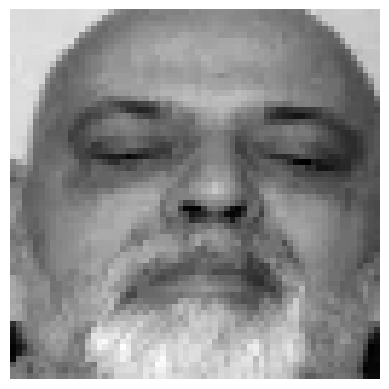

In [19]:
import os
import cv2
import numpy as np
from facenet_pytorch import MTCNN
from PIL import Image
import matplotlib.pyplot as plt

mtcnn = MTCNN()  
images = []
path = r'C:\Users\shrpa\Desktop\Stroke_proj\imagespath'

for image_name in os.listdir(path):
    image = Image.open(os.path.join(path, image_name)).convert('RGB') 
    image = mtcnn(image)  

    if image is not None:
        image = image.permute(1, 2, 0).numpy()  # Convert torch tensor to numpy array (H, W, C)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
        image = cv2.resize(image, (64, 64))  
        
        image = np.float32(image)  
        image = cv2.normalize(image, None, 0, 1.0, cv2.NORM_MINMAX)  # Normalize to [0, 1]
        
        images.append(image)

images = np.array(images)

plt.imshow(images[0], cmap='gray')
plt.axis('off')
plt.show()


In [20]:
'''
rows,cols = images[0].shape

for i in range(rows):
    for j in range(cols):
        k = images[0][i,j]
        print(k)
'''

0.8615726
0.86120576
0.8608922
0.8530778
0.85294807
0.8521135
0.8611712
0.8615173
0.86059767
0.865757
0.8590867
0.86140627
0.8730776
0.8771057
0.8778256
0.8574391
0.8535683
0.68798935
0.5416711
0.49605644
0.4696378
0.45680693
0.48027763
0.4580373
0.51788807
0.51407826
0.5117063
0.5108229
0.5071591
0.5052382
0.50632983
0.54785573
0.52606356
0.5429336
0.5452165
0.5446593
0.5471826
0.5478118
0.5450473
0.52992785
0.5297147
0.5266175
0.5134479
0.49106798
0.48325118
0.48625687
0.4680947
0.44011265
0.4620008
0.46827936
0.44222394
0.6463105
0.825958
0.7782373
0.789181
0.789089
0.79805845
0.8076685
0.8076685
0.8076685
0.7979072
0.77879125
0.76704633
0.7773889
0.85914
0.8602056
0.8615901
0.85359395
0.8554034
0.8542008
0.86234987
0.8611077
0.8619423
0.8610642
0.8575493
0.8612444
0.86801267
0.8775116
0.8628204
0.8212815
0.56568235
0.49046198
0.47236162
0.4640588
0.4427177
0.47188494
0.47119838
0.4979184
0.4875641
0.49085566
0.49317765
0.52998847
0.52876055
0.52790034
0.5330929
0.53194153
0.5375237